### Importing Packages for building classification models using Machine Learning

In [194]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [195]:
## Load the data
data=pd.read_csv('bank-additional.csv', sep=";")

In [196]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### BANKING Data set

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


In [197]:
#to check the number of observations(rows) and features(columns) in the dataset
data.shape

(4119, 21)

In [198]:
# It helps to understand the data type and information about data, 
# including the number of records in each column, data having null or not null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [199]:
#we can identify the continuous and categorical columns in the data
#here no duplicate value primary_id id ID column
#if distinct count of column is one then we remove that column
nuique_value=pd.DataFrame(data.nunique())
nuique_value

,0
age,67
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [200]:
# are there  any duplicate columns?
data.duplicated().sum() # to check duplcate

0

#### Exploratory Analysis

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [201]:
# Distribution of Y
print(data.y.value_counts())
print(data.y.value_counts()/data.y.count())

no     3668
yes     451
Name: y, dtype: int64
no     0.890507
yes    0.109493
Name: y, dtype: float64


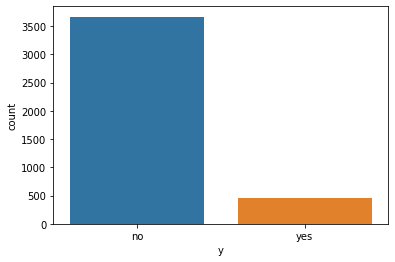

In [202]:
sns.countplot(x="y", data=data)
plt.show()
#imbalance dataset hence we have care about accuracy metrices.

In [203]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.
- duration, avg duration of call with responder is higher than not repsonders
- Previous (number of contacts performed before campaign) avg prevoius contacts with responder is higher than not repsonders

In [204]:
#Renaming the columsns by replacing special characters with underscore
data.columns = [ i.replace('.', '_') for i in data.columns]

In [205]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Categorical visualization with output variable y

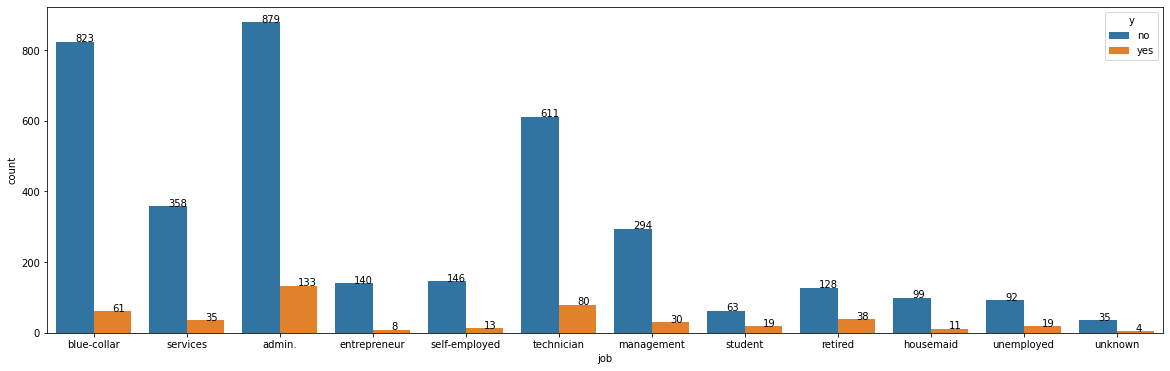

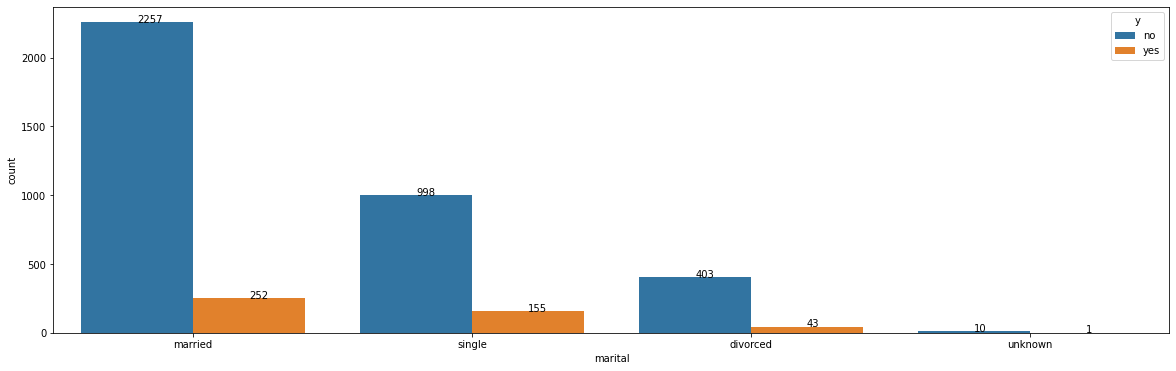

posx and posy should be finite values
posx and posy should be finite values


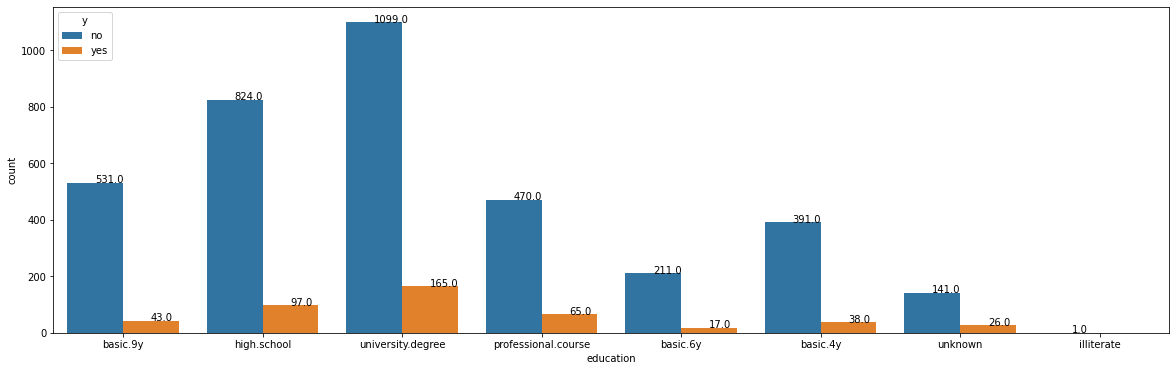

posx and posy should be finite values
posx and posy should be finite values


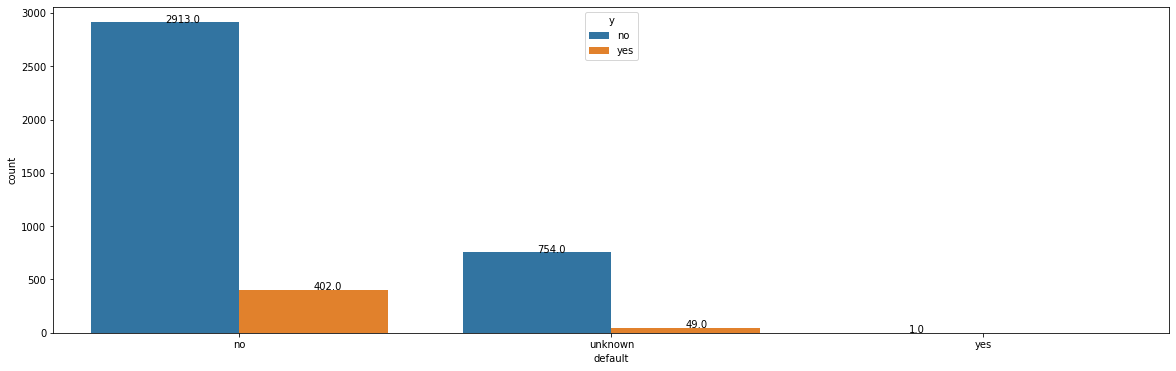

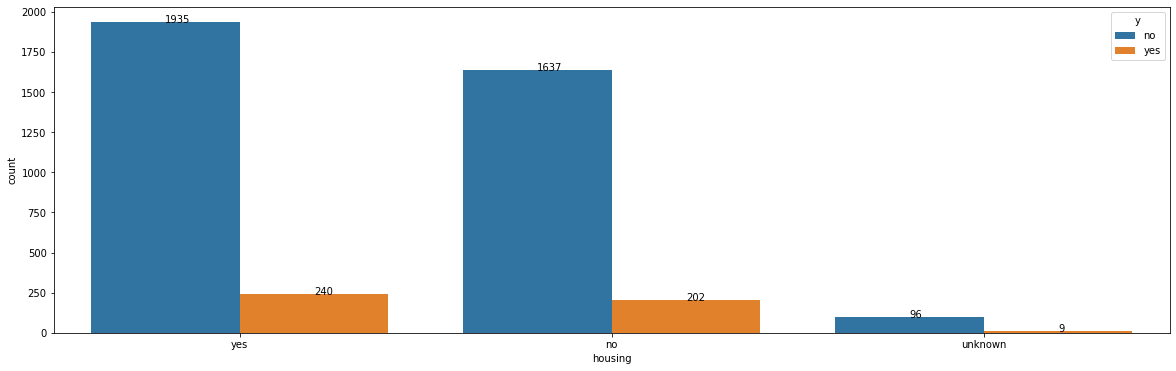

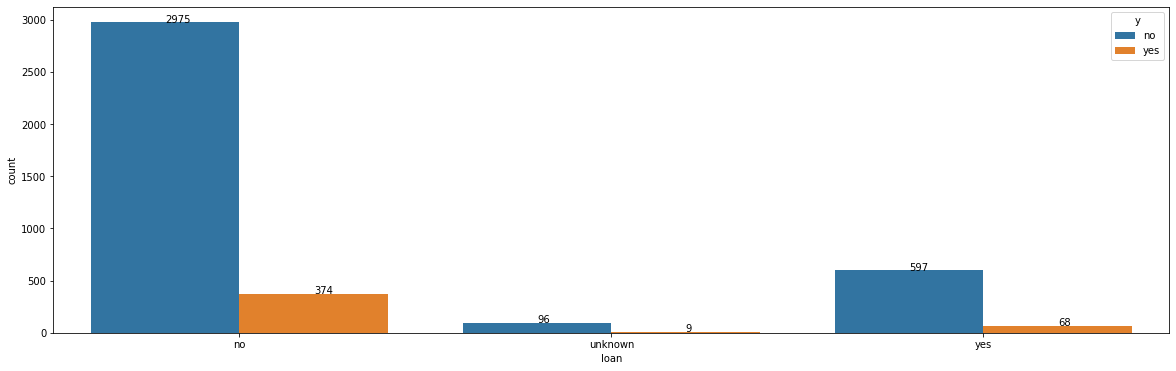

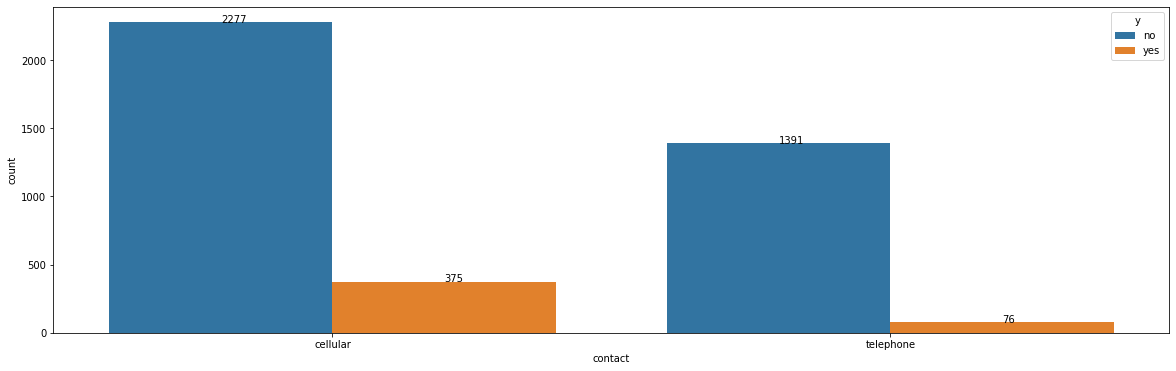

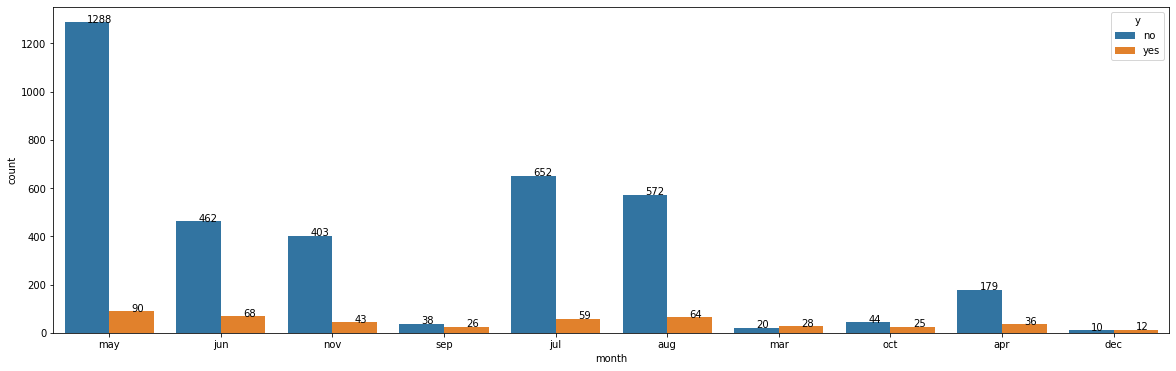

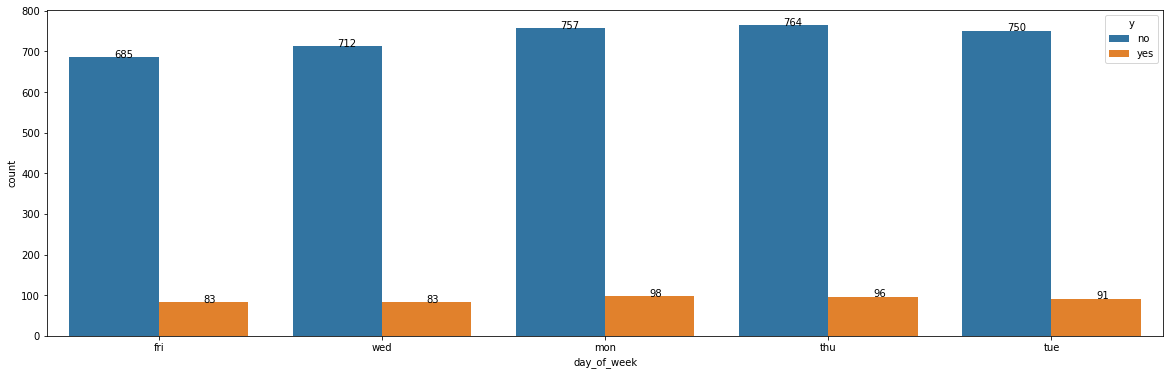

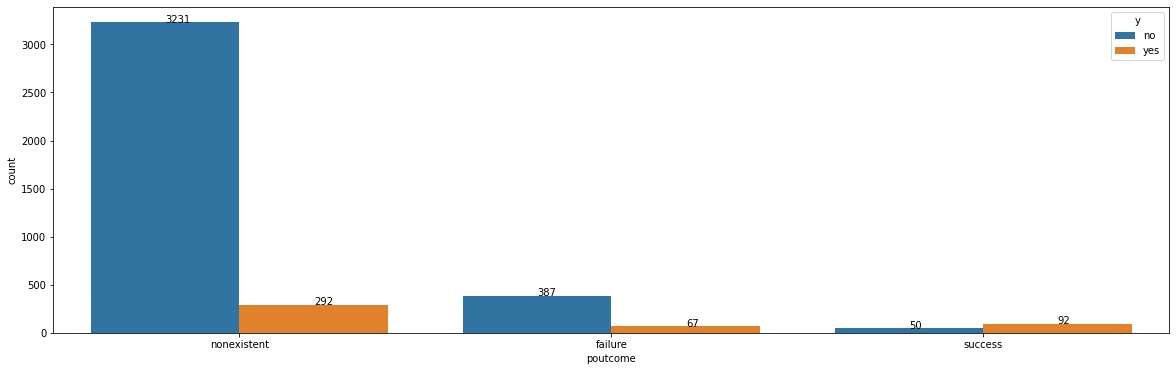

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


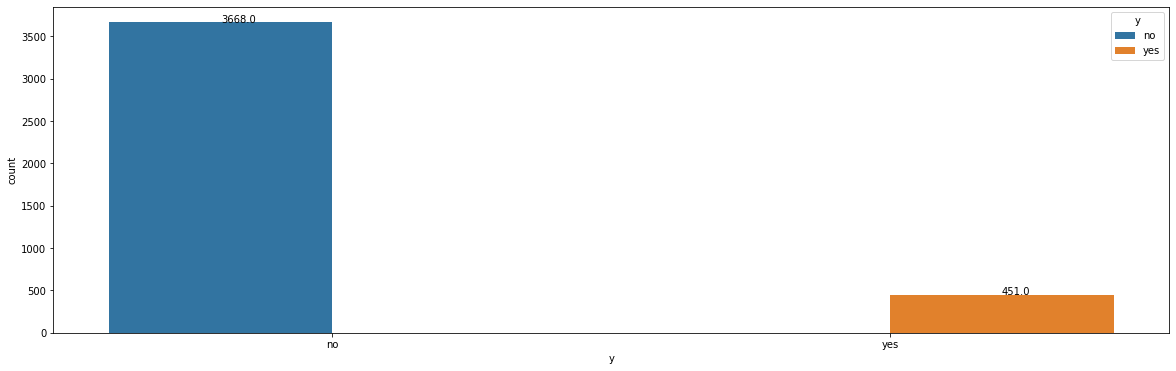

In [206]:
columnlist=data.select_dtypes(include=['object']).columns.tolist()
for i in columnlist:
    plt.figure(figsize = (20, 6))
    ax=sns.countplot(x=i,hue="y",data=data)
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = height) # data label, formatted to ignore decimals
        
    plt.show()

##### Observation
- In Default column on Yes values rest values is NO, so drop this column
- In marital column unknown counts is very less, so drop this column
- in Education column count of illiterate is one  so filter this value
- Admin, blue collar and technician have high respose to the compaign
- drop poutcome column almost data is non-existance

In [207]:
data=data[data["education"]!="illiterate"]
data=data[data["marital"]!="unknown"]
data=data.drop(["default","poutcome"],axis=1) 

### Statistical analysis

In [208]:
# Use a general function that returns multiple values
nums_cols=data.select_dtypes(include=np.number).columns.tolist()
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['Count', 'NULL', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data[nums_cols].apply(lambda x: var_summary(x)).T

In [209]:
num_summary

,Count,NULL,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4107.0,0.0,1.647210e+05,40.107378,38.000,10.310518,106.306782,18.000,24.000,26.0000,28.000,32.000,38.000,47.000,55.000,58.000,68.000,88.000
duration,4107.0,0.0,1.053865e+06,256.602143,180.000,254.876688,64962.126133,0.000,11.000,35.0000,60.000,103.000,180.000,317.000,545.400,741.400,1233.220,3643.000
campaign,4107.0,0.0,1.041900e+04,2.536888,2.000,2.566844,6.588690,1.000,1.000,1.0000,1.000,1.000,2.000,3.000,5.000,7.000,13.000,35.000
pdays,4107.0,0.0,3.943991e+06,960.309472,999.000,192.191685,36937.643853,0.000,3.000,999.0000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,4107.0,0.0,7.830000e+02,0.190650,0.000,0.542343,0.294136,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,6.000
emp_var_rate,4107.0,0.0,3.509000e+02,0.085439,1.100,1.562729,2.442121,-3.400,-3.400,-2.9000,-1.800,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons_price_idx,4107.0,0.0,3.843337e+05,93.580153,93.749,0.579357,0.335654,92.201,92.201,92.7130,92.893,93.075,93.749,93.994,94.465,94.465,94.601,94.767
cons_conf_idx,4107.0,0.0,-1.663478e+05,-40.503482,-41.800,4.594081,21.105582,-50.800,-50.000,-47.1000,-46.200,-42.700,-41.800,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,4107.0,0.0,1.487312e+04,3.621408,4.857,1.733655,3.005560,0.635,0.677,0.8048,1.029,1.334,4.857,4.961,4.964,4.966,4.968,5.045
nr_employed,4107.0,0.0,2.121874e+07,5166.482445,5191.000,73.709360,5433.069796,4963.600,4963.600,5008.7000,5076.200,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


- Duration/Campaign have outliers
- Drop pdays column because almost 75% data is same

posx and posy should be finite values
posx and posy should be finite values


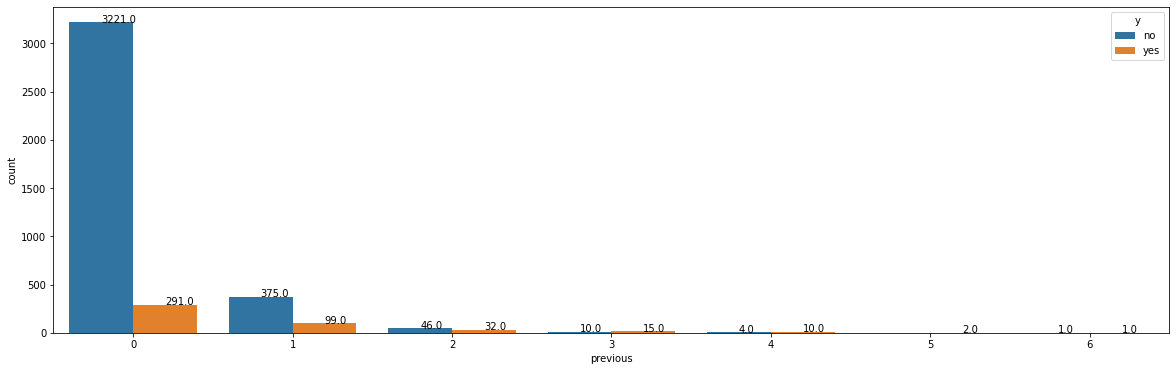

In [210]:
# sns.histplot(data=data,x="previous",hue="y")
plt.figure(figsize = (20, 6))
ax=sns.countplot(x="previous",hue="y",data=data)
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = height) # data label, formatted to ignore decimals
        
plt.show()

In [211]:
#25 percentile is 999 and almost all value is same
data=data.drop(["pdays"],axis=1)

In [212]:
data.describe(include=[object]).T
#use to categorical null handling

,count,unique,top,freq
job,4107,12,admin.,1009
marital,4107,3,married,2509
education,4107,7,university.degree,1259
housing,4107,3,yes,2170
loan,4107,3,no,3338
contact,4107,2,cellular,2644
month,4107,10,may,1373
day_of_week,4107,5,thu,857
y,4107,2,no,3657


Null and Missing value handling

In [213]:
def missing_cat(x):
    t = x.value_counts()
    x[x=='unknown'] = t.index[0]
    return x

def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x


In [214]:
cat_data=data[data.select_dtypes(include=['object']).columns.tolist()]
num_data=data[data.select_dtypes(include=np.number).columns.tolist()]

cat_data=cat_data.apply(missing_cat)
num_data=num_data.apply(missing_num)

dataframe = pd.concat([num_data, cat_data], axis=1)
dataframe.isnull().sum().sum()

0

In [215]:
dataframe.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,housing,loan,contact,month,day_of_week,y
0,30,487.0,2,0,-1.8,92.893,-46.2,1.313,5099.1,blue-collar,married,basic.9y,yes,no,cellular,may,fri,no
1,39,346.0,4,0,1.1,93.994,-36.4,4.855,5191.0,services,single,high.school,no,no,telephone,may,fri,no
2,25,227.0,1,0,1.4,94.465,-41.8,4.962,5228.1,services,married,high.school,yes,no,telephone,jun,wed,no
3,38,17.0,3,0,1.4,94.465,-41.8,4.959,5228.1,services,married,basic.9y,yes,no,telephone,jun,fri,no
4,47,58.0,1,0,-0.1,93.200,-42.0,4.191,5195.8,admin.,married,university.degree,yes,no,cellular,nov,mon,no


### Outlier removing

age
Skew : 0.72


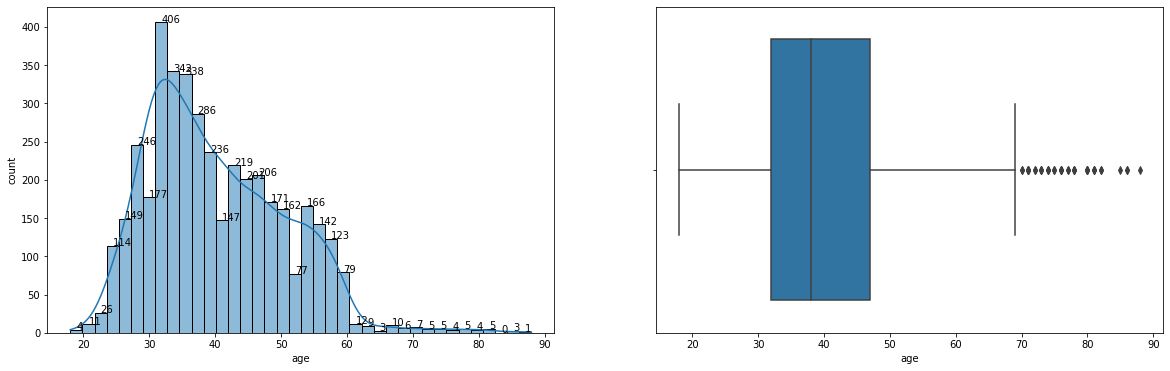

duration
Skew : 3.3


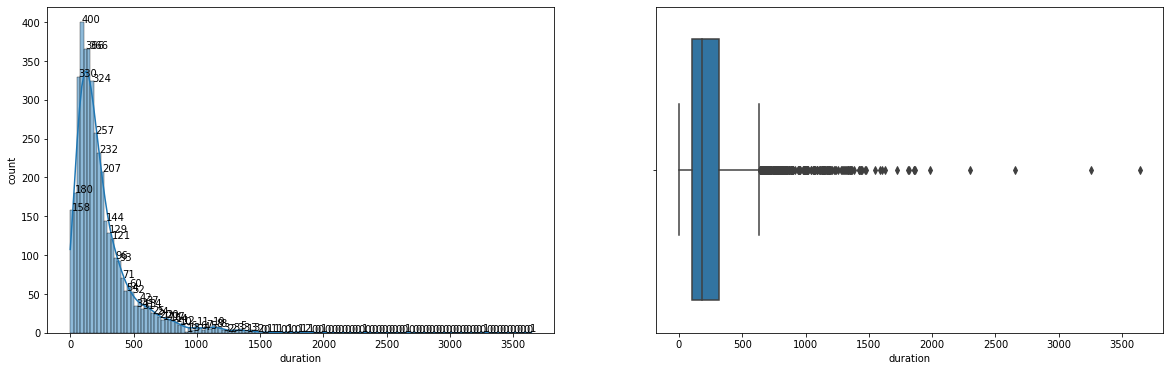

campaign
Skew : 4.01


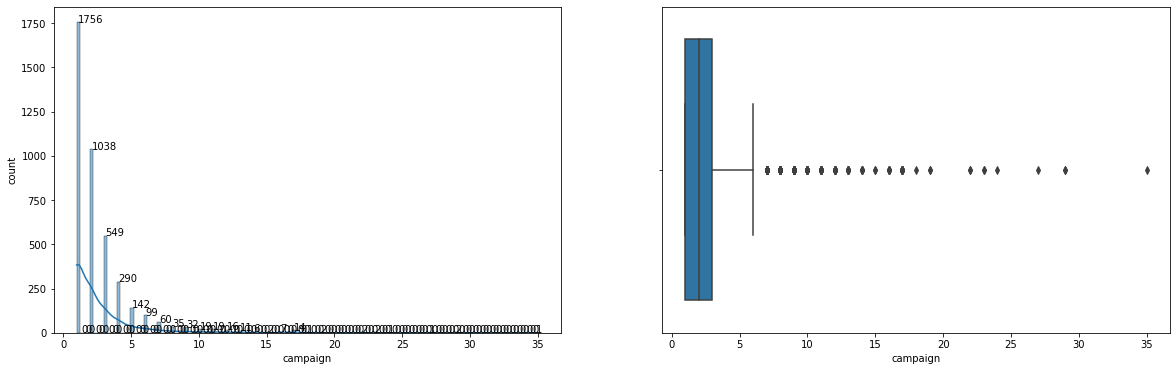

previous
Skew : 4.02


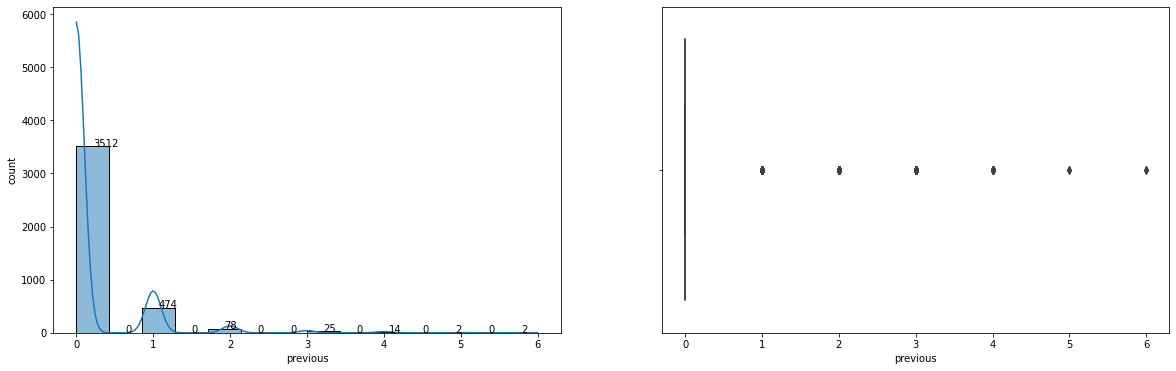

emp_var_rate
Skew : -0.73


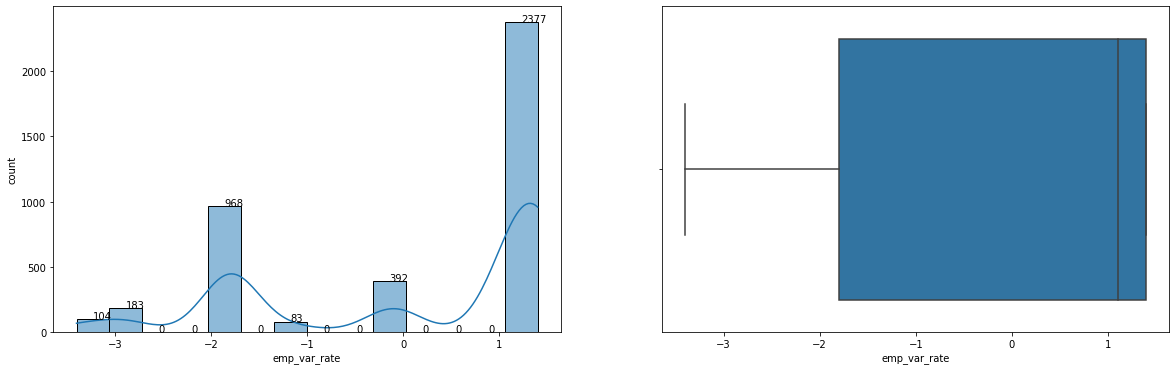

cons_price_idx
Skew : -0.22


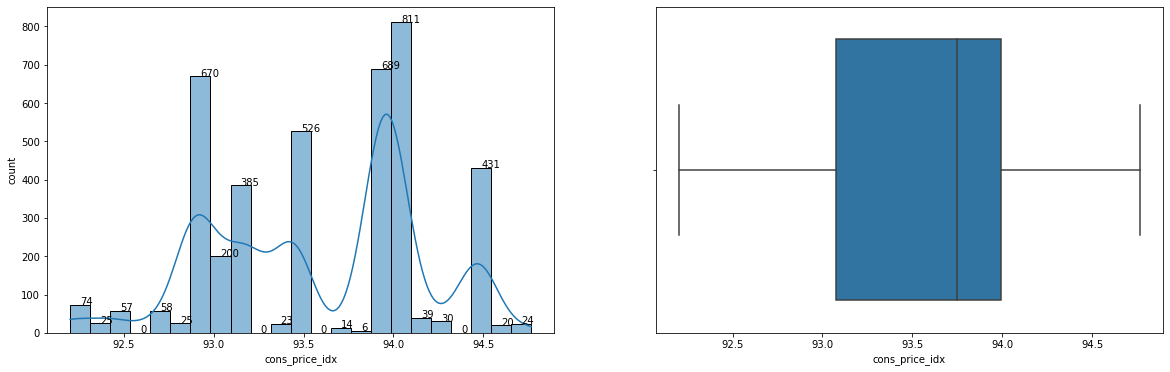

cons_conf_idx
Skew : 0.29


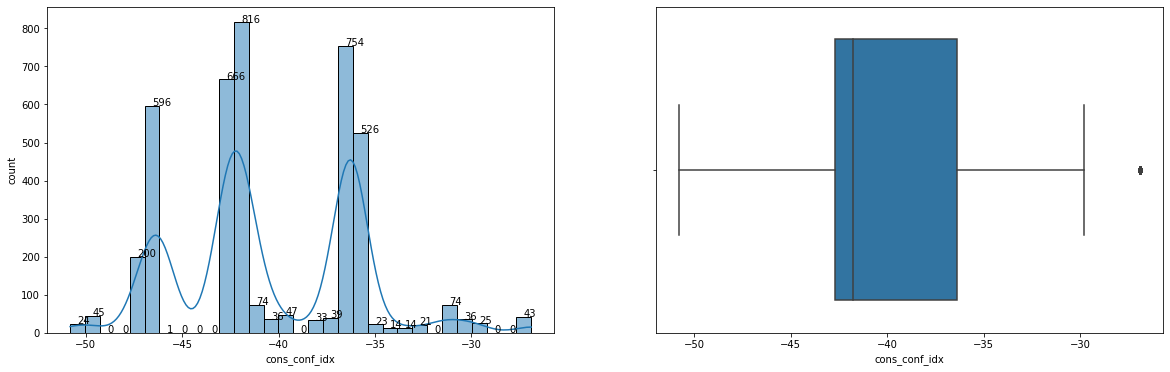

euribor3m
Skew : -0.72


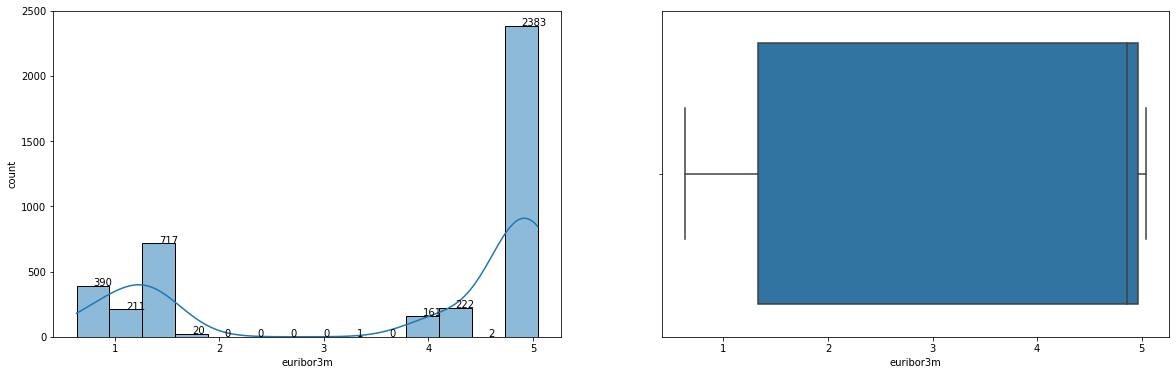

nr_employed
Skew : -1.08


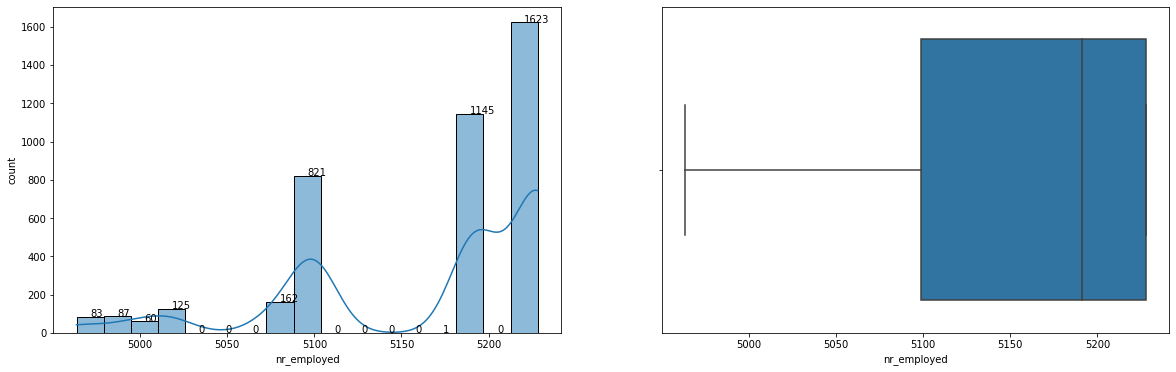

In [216]:
# Used for outlier removing, transformation and data distribution
cols=dataframe.select_dtypes(include=np.number).columns.tolist()
for col in cols:
    print(col)
    print('Skew :', round(dataframe[col].skew(), 2))
    plt.figure(figsize = (20, 6))
    
    plt.subplot(1, 2, 1)
    ax=sns.histplot(dataframe[col],kde=True)
    # plt.text(x=df[col],y=df[col].count(),s=df[col].count())
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = height) # data label, formatted to ignore decimals
        # ha = center) # sets horizontal alignment (ha) to center
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col])
    plt.show()


In [217]:
df=dataframe[dataframe["age"]<70]
df["duration"]=df["duration"]**(1/2)
df=df[df["duration"]<=30]
df=df[df["campaign"]<10]
df=df[df["previous"]<=3]


age
Skew : 0.43


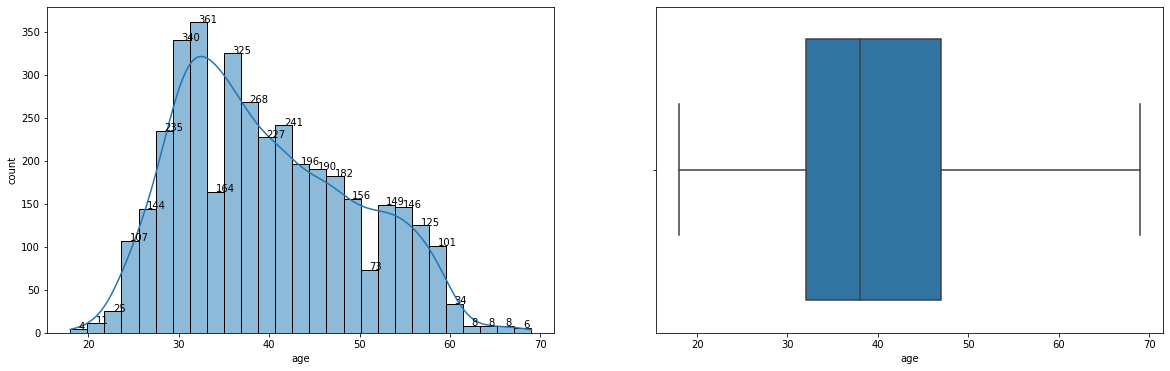

duration
Skew : 0.57


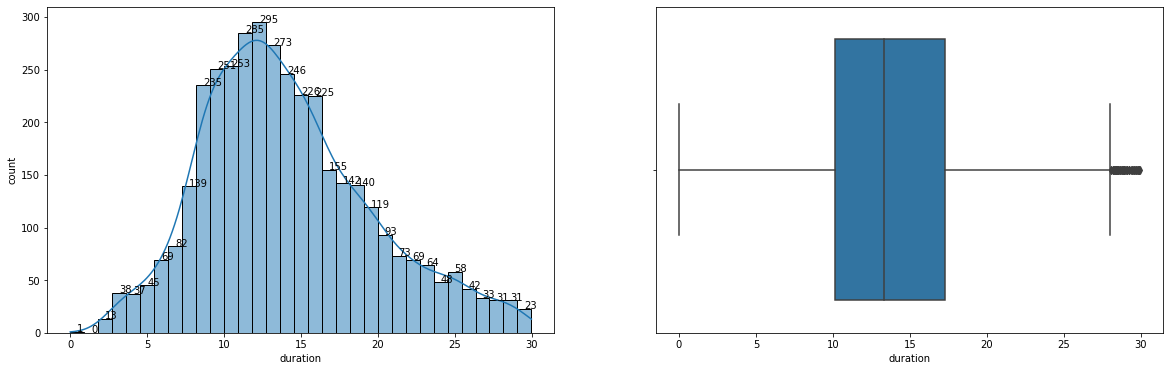

campaign
Skew : 1.78


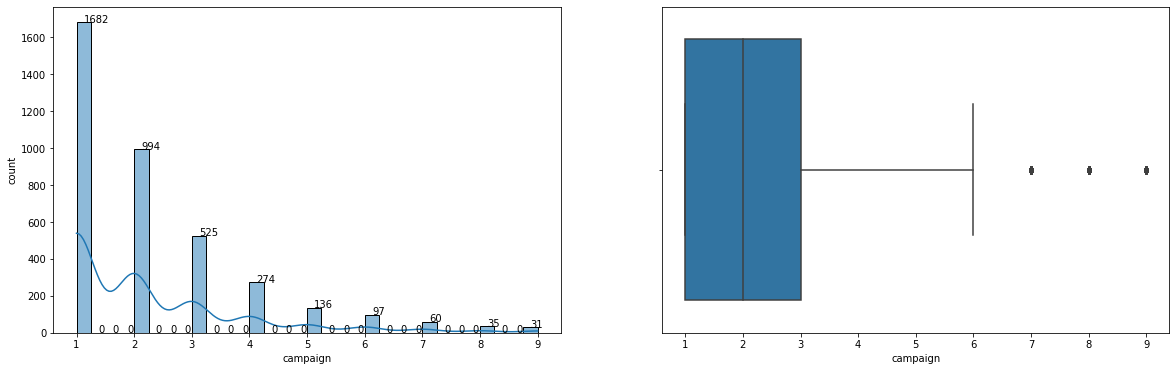

previous
Skew : 3.08


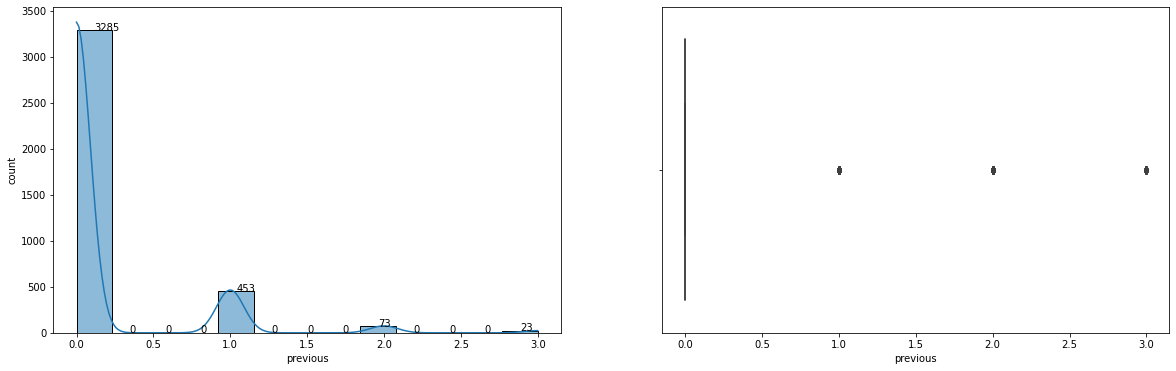

emp_var_rate
Skew : -0.72


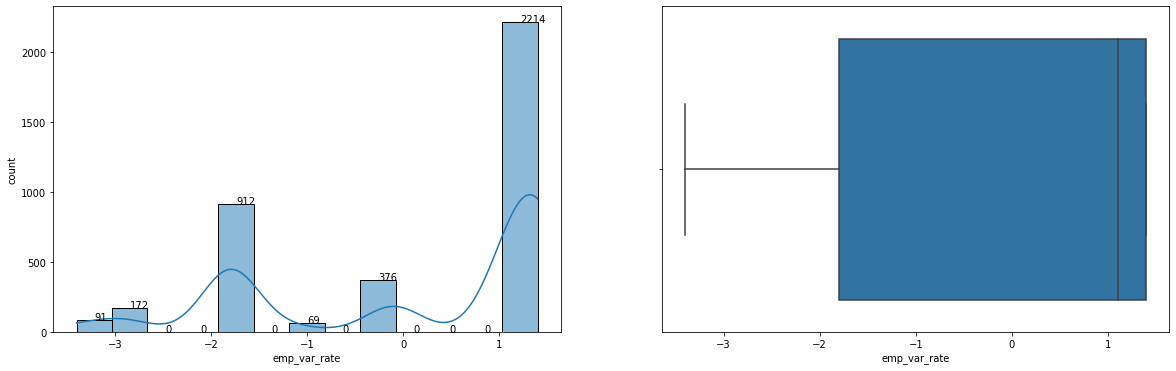

cons_price_idx
Skew : -0.18


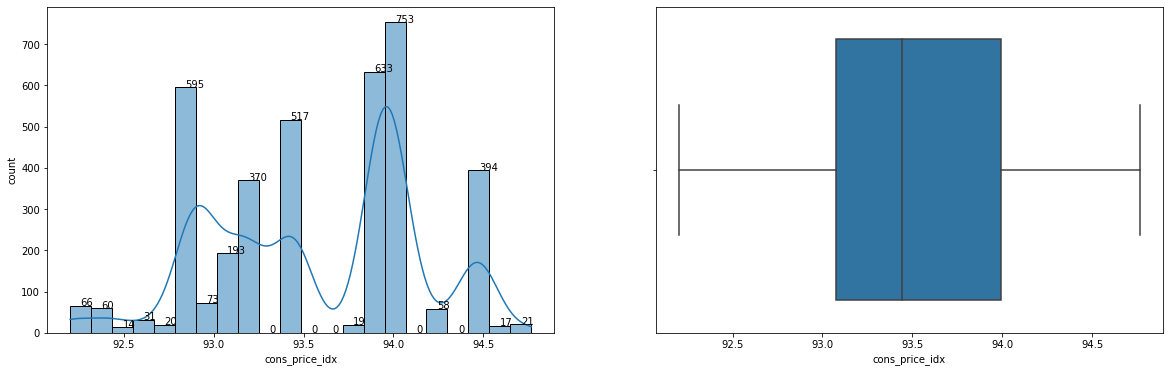

cons_conf_idx
Skew : 0.28


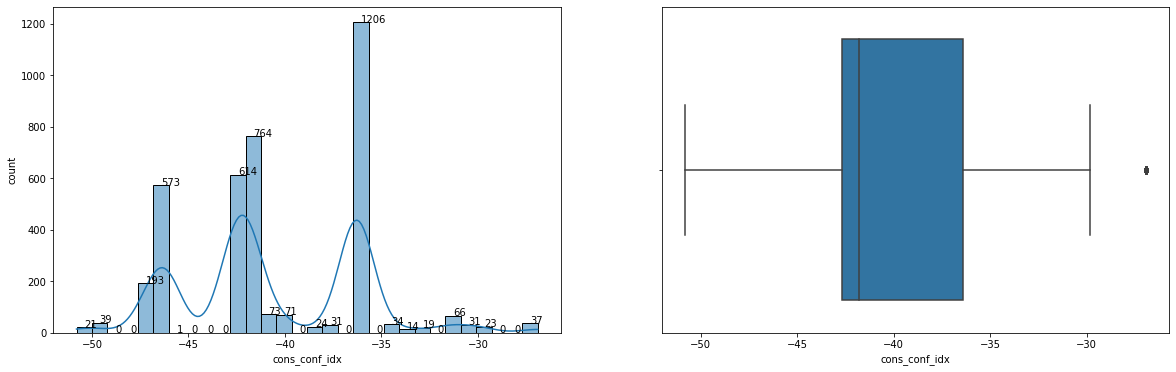

euribor3m
Skew : -0.72


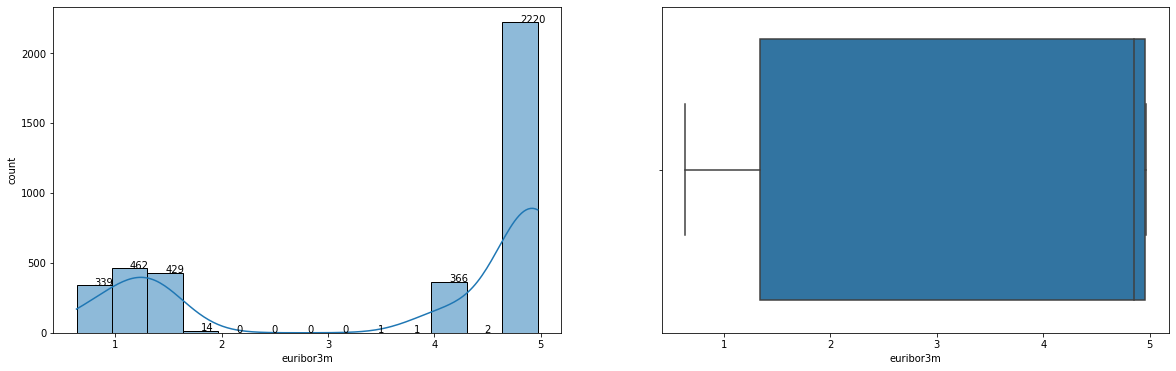

nr_employed
Skew : -1.07


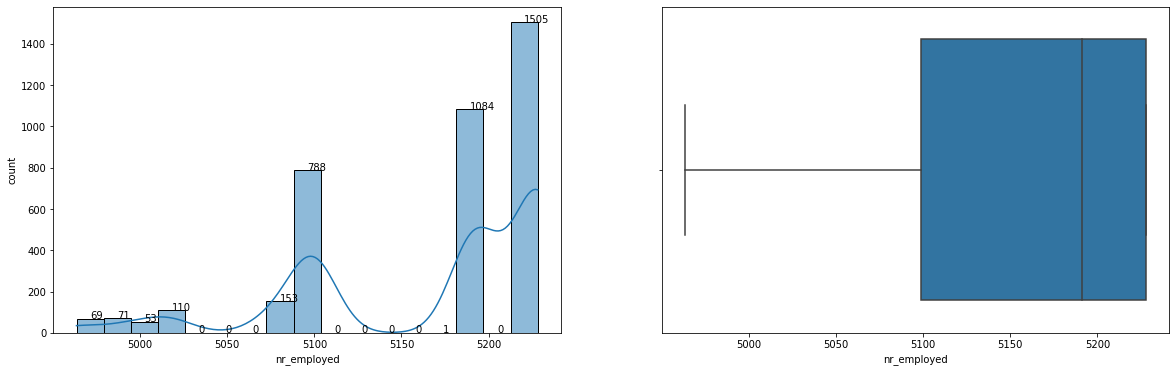

In [218]:
# Used for outlier removing, transformation and data distribution
c=df.select_dtypes(include=np.number).columns.tolist()
for col in c:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (20, 6))
    
    plt.subplot(1, 2, 1)
    ax=sns.histplot(df[col],kde=True)
    # plt.text(x=df[col],y=df[col].count(),s=df[col].count())
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = height) # data label, formatted to ignore decimals
        # ha = center) # sets horizontal alignment (ha) to center
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [219]:
df.education.value_counts()

university.degree      1327
high.school             857
basic.9y                545
professional.course     501
basic.4y                391
basic.6y                213
Name: education, dtype: int64

In [220]:
# lets output variable y  variable
# lets encode the variable
df.y = df.y.map({'yes':1,'no':0})
df.education=df.education.map({'basic.4y':0,'basic.6y':1,'basic.9y':2,
                                   'high.school':3,'university.degree':4,'professional.course':5})
df.loan=df.loan.map({'yes':1,'no':0})
df.housing=df.housing.map({'yes':1,'no':0})

In [221]:
df.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,housing,loan,contact,month,day_of_week,y
0,30,22.068076,2,0,-1.8,92.893,-46.2,1.313,5099.1,blue-collar,married,2,1,0,cellular,may,fri,0
1,39,18.601075,4,0,1.1,93.994,-36.4,4.855,5191.0,services,single,3,0,0,telephone,may,fri,0
2,25,15.066519,1,0,1.4,94.465,-41.8,4.962,5228.1,services,married,3,1,0,telephone,jun,wed,0
3,38,4.123106,3,0,1.4,94.465,-41.8,4.959,5228.1,services,married,2,1,0,telephone,jun,fri,0
4,47,7.615773,1,0,-0.1,93.200,-42.0,4.191,5195.8,admin.,married,4,1,0,cellular,nov,mon,0


In [222]:
print(df.shape)
df = pd.get_dummies(df)
print(df.shape)

(3834, 18)
(3834, 44)


In [223]:
#Renaming the columsns by replacing special characters with underscore
df.columns = [ i.replace('.', '_') for i in df.columns]
df.columns = [ i.replace('-', '_') for i in df.columns]

In [224]:
df.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'education', 'housing', 'loan', 'y', 'job_admin_', 'job_blue_collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

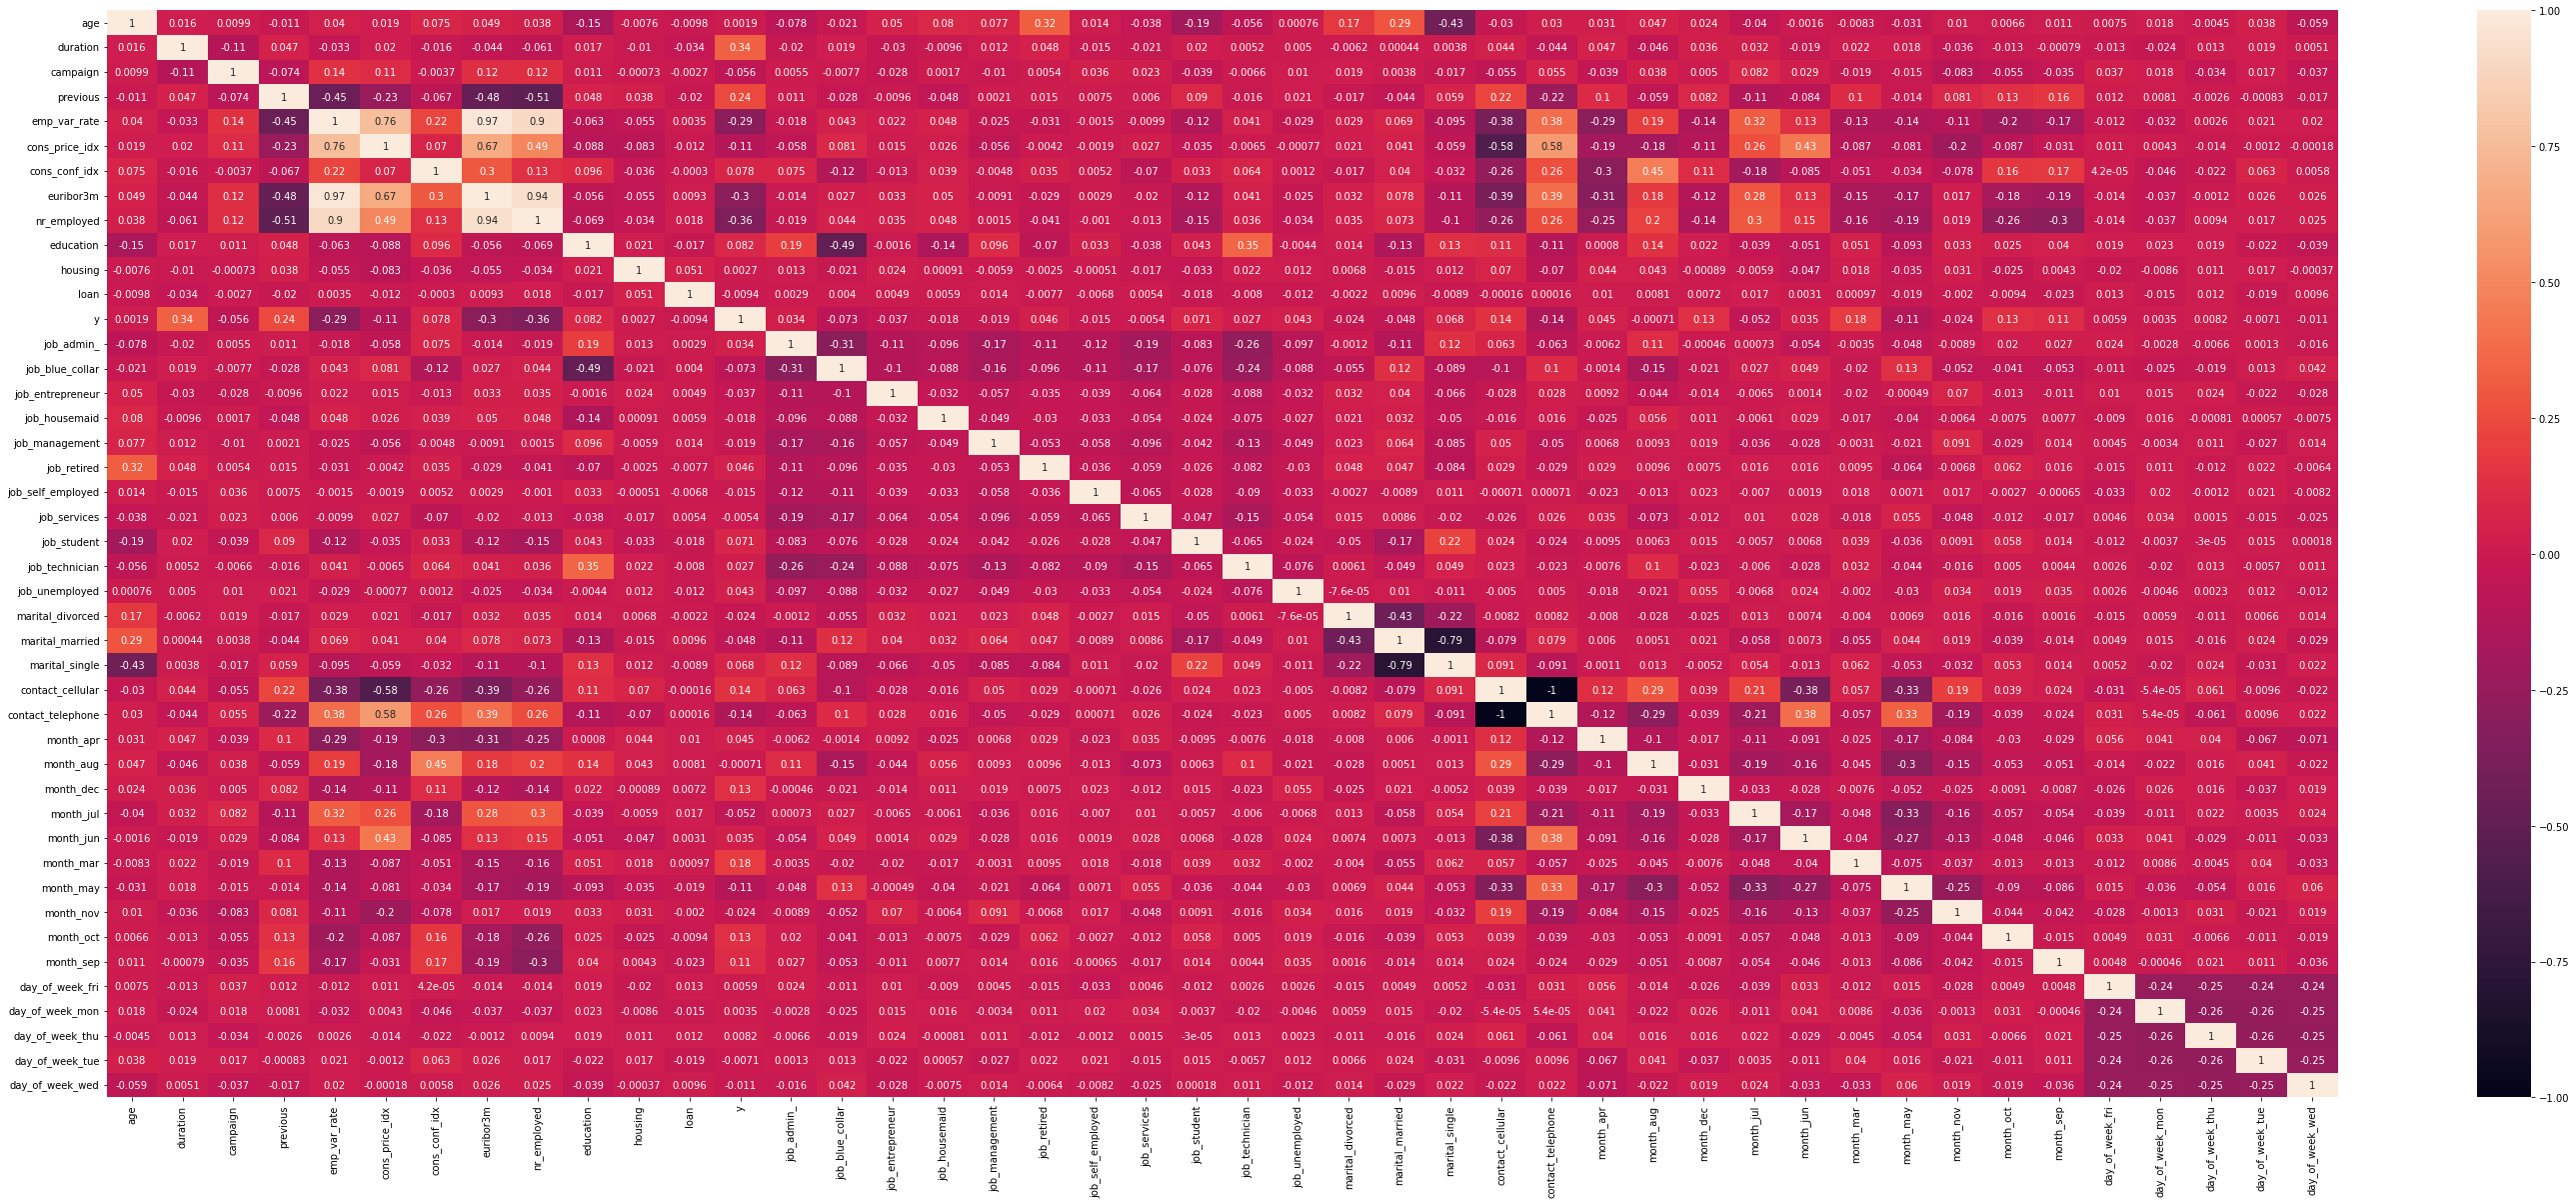

In [225]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.show()

In [226]:
#drop column these highly co related
df=df.drop(["cons_price_idx","nr_employed","euribor3m"],axis=1)

In [227]:
# lets check the highest correlation with target variable
#delete complain column it is not related to any column

df.corr()['y'].sort_values(ascending=False)

y                    1.000000
duration             0.335861
previous             0.237978
month_mar            0.184810
contact_cellular     0.135428
month_oct            0.130146
month_dec            0.128363
month_sep            0.108625
education            0.081888
cons_conf_idx        0.077929
job_student          0.071262
marital_single       0.068164
job_retired          0.046174
month_apr            0.045040
job_unemployed       0.042962
month_jun            0.034890
job_admin_           0.033525
job_technician       0.027386
day_of_week_thu      0.008186
day_of_week_fri      0.005941
day_of_week_mon      0.003521
housing              0.002714
age                  0.001939
month_aug           -0.000706
job_services        -0.005415
day_of_week_tue     -0.007116
loan                -0.009383
day_of_week_wed     -0.010604
job_self_employed   -0.015427
job_housemaid       -0.018383
job_management      -0.018794
month_nov           -0.024088
marital_divorced    -0.024133
job_entrep

### Feature Selection

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,mutual_info_classif,f_classif,SelectKBest
#variable reduction (feature selection/reduction)
#RFE - Recursive Feature Elimination - This might mislead you if the data have multicollinieirity
#SelectKBest (mutual_info_classification,f_classi[Anova])

#### RFE

In [229]:
X = df[df.columns.difference(['y'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, n_features_to_select=12)
rfe = rfe.fit(X, df['y'] )
rfe.support_
imp_vars_RFE = list(X.columns[rfe.support_])
imp_vars_RFE

['age',
 'campaign',
 'cons_conf_idx',
 'day_of_week_mon',
 'day_of_week_thu',
 'duration',
 'education',
 'emp_var_rate',
 'housing',
 'job_admin_',
 'marital_married',
 'previous']

#### Select KBEST

In [230]:
X = df[df.columns.difference(['y'])]
SKB = SelectKBest(f_classif, k=12).fit(X, df[['y']] )
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['cons_conf_idx',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'education',
 'emp_var_rate',
 'month_dec',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'previous']

### Mutual info

In [231]:
from sklearn.feature_selection import mutual_info_classif
X = df[df.columns.difference(['y'])]
MIC = SelectKBest(mutual_info_classif, k=12).fit(X, df[['y']] )
SKB.get_support()
imp_vars_MIC = list(X.columns[MIC.get_support()])
imp_vars_MIC

['age',
 'cons_conf_idx',
 'contact_telephone',
 'duration',
 'emp_var_rate',
 'job_blue_collar',
 'job_housemaid',
 'job_student',
 'month_dec',
 'month_mar',
 'month_oct',
 'previous']

In [232]:
Final_list_cols = list(set(imp_vars_SKB + imp_vars_MIC + imp_vars_RFE ))
print(len(Final_list_cols))
y='y'
if(y not in Final_list_cols):
    Final_list_cols.append('y')


22


In [233]:
trainDataset=df[Final_list_cols]
trainDataset.head()

,education,job_blue_collar,housing,contact_telephone,age,contact_cellular,job_student,day_of_week_thu,marital_married,month_sep,...,job_housemaid,cons_conf_idx,emp_var_rate,month_may,month_oct,previous,day_of_week_mon,month_dec,month_mar,y
0,2,1,1,0,30,1,0,0,1,0,...,0,-46.2,-1.8,1,0,0,0,0,0,0
1,3,0,0,1,39,0,0,0,0,0,...,0,-36.4,1.1,1,0,0,0,0,0,0
2,3,0,1,1,25,0,0,0,1,0,...,0,-41.8,1.4,0,0,0,0,0,0,0
3,2,0,1,1,38,0,0,0,1,0,...,0,-41.8,1.4,0,0,0,0,0,0,0
4,4,0,1,0,47,1,0,0,1,0,...,0,-42.0,-0.1,0,0,0,1,0,0,0


#### Transformation and Scaling
alomost data in form of 0 and 1.

In [234]:
from sklearn.preprocessing import StandardScaler
def scaling_implementation(x):
    scaling=StandardScaler()
 
    # Use fit and transform method
    Scaled_data=scaling.fit_transform(x)
    return Scaled_data

### Splitting the data into train & test 

In [235]:
target=trainDataset['y']
inputData=trainDataset.drop('y',axis=1)
inputDataset=scaling_implementation(inputData)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest,  = train_test_split(inputDataset,target, test_size=0.3, random_state=42)

## Model

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier( max_depth = 3 )

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)

from sklearn.svm import SVC
svcrbf = SVC(kernel='rbf', class_weight='balanced')
svclinear = SVC(kernel='linear', class_weight='balanced')
svcpoly=SVC(kernel='poly', class_weight='balanced')

import xgboost as xgb
xgbclass=xgb.XGBClassifier(random_state=42)

from sklearn.ensemble import BaggingClassifier
bagclassrbf=BaggingClassifier(SVC(kernel='rbf', class_weight='balanced'),max_samples=0.5, max_features=0.5)
bagclasslinear=BaggingClassifier(SVC(kernel='linear', class_weight='balanced'),max_samples=0.5, max_features=0.5)
bagclassknn=BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [237]:
cols=inputData.columns

def model_output(ml,xtrain,ytrain,xtest,ytest):    
    for i in ml:
        print(i," Model")
        model_fit=i.fit(xtrain,ytrain)
        # print('Train score',model_fit.score(xtrain,ytrain))
        train_predict=model_fit.predict(xtrain)
        ml_output=model_fit.predict(xtest)
        # print("testing Accuracy= ",accuracy_score(ytest,ml_output)*100)
        cm = confusion_matrix(ytest,ml_output)
        color = 'white'
        matrix = plot_confusion_matrix(model_fit, xtest, ytest, cmap=plt.cm.Blues)
        matrix.ax_.set_title('Confusion Matrix', color=color)
        plt.xlabel('Predicted Label', color=color)
        plt.ylabel('True Label', color=color)
        plt.gcf().axes[0].tick_params(colors=color)
        plt.gcf().axes[1].tick_params(colors=color)
        plt.show()
        print()
        print("Training Accuracy Report:")
        print(metrics.classification_report(ytrain, train_predict))
        print("Testing Accuracy Report:")
        print(metrics.classification_report(ytest, ml_output))
        print()
        # Performing logistic Regression using K-Fold validation manually
        from sklearn.model_selection import cross_val_score, KFold
        kfold = KFold(n_splits=10, random_state=7,shuffle=True)
        scoring = 'accuracy'
        results = cross_val_score(i, xtrain, ytrain, cv=kfold, scoring=scoring)
        print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
        print("--------------------------------------------------------------------")
        print()
        


For example, for our dataset, we can consider that achieving a high recall is more important than getting a high precision – we would like to detect as many heart patients as possible. For some other models, like classifying whether or not a bank customer is a loan defaulter, it is desirable to have high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.

F1-score is harmonic mean of precision and recall(i.e both are important)
Here is Imbalanced dataset then we use Precision and recall accuracy metrices

Here Model Performance based on recall
 because model predict having subscribe to not subscribe

LogisticRegression()  Model


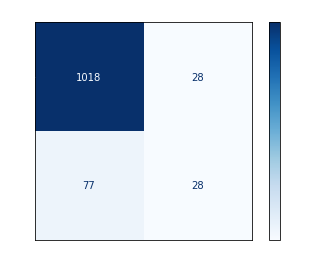


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2440
           1       0.60      0.31      0.41       243

    accuracy                           0.92      2683
   macro avg       0.77      0.65      0.68      2683
weighted avg       0.90      0.92      0.91      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1046
           1       0.50      0.27      0.35       105

    accuracy                           0.91      1151
   macro avg       0.71      0.62      0.65      1151
weighted avg       0.89      0.91      0.90      1151


10-fold cross validation average accuracy: 0.915
--------------------------------------------------------------------

KNeighborsClassifier(weights='distance')  Model


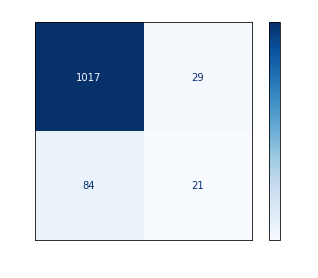


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       243

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1046
           1       0.42      0.20      0.27       105

    accuracy                           0.90      1151
   macro avg       0.67      0.59      0.61      1151
weighted avg       0.88      0.90      0.89      1151


10-fold cross validation average accuracy: 0.912
--------------------------------------------------------------------

DecisionTreeClassifier(max_depth=3)  Model


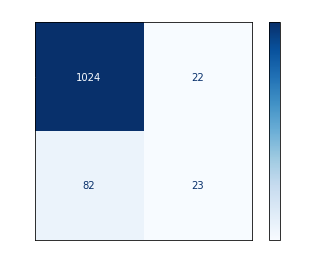


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2440
           1       0.69      0.33      0.45       243

    accuracy                           0.93      2683
   macro avg       0.81      0.66      0.70      2683
weighted avg       0.91      0.93      0.91      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1046
           1       0.51      0.22      0.31       105

    accuracy                           0.91      1151
   macro avg       0.72      0.60      0.63      1151
weighted avg       0.89      0.91      0.89      1151


10-fold cross validation average accuracy: 0.915
--------------------------------------------------------------------

RandomForestClassifier(max_features=6, n_jobs=-1, oob_score=True)  Model


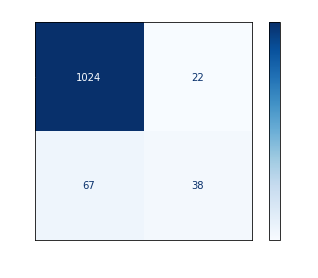


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       243

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1046
           1       0.63      0.36      0.46       105

    accuracy                           0.92      1151
   macro avg       0.79      0.67      0.71      1151
weighted avg       0.91      0.92      0.91      1151


10-fold cross validation average accuracy: 0.922
--------------------------------------------------------------------

SVC(class_weight='balanced')  Model


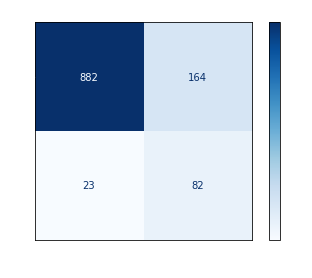


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      2440
           1       0.44      0.98      0.61       243

    accuracy                           0.89      2683
   macro avg       0.72      0.93      0.77      2683
weighted avg       0.95      0.89      0.90      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1046
           1       0.33      0.78      0.47       105

    accuracy                           0.84      1151
   macro avg       0.65      0.81      0.69      1151
weighted avg       0.92      0.84      0.86      1151


10-fold cross validation average accuracy: 0.850
--------------------------------------------------------------------

SVC(class_weight='balanced', kernel='linear')  Model


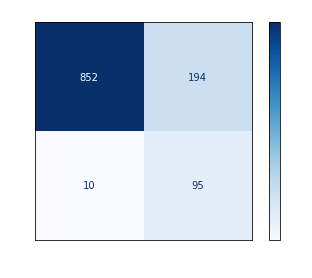


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2440
           1       0.35      0.92      0.51       243

    accuracy                           0.84      2683
   macro avg       0.67      0.88      0.71      2683
weighted avg       0.93      0.84      0.87      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1046
           1       0.33      0.90      0.48       105

    accuracy                           0.82      1151
   macro avg       0.66      0.86      0.69      1151
weighted avg       0.93      0.82      0.86      1151


10-fold cross validation average accuracy: 0.835
--------------------------------------------------------------------

SVC(class_weight='balanced', kernel='poly')  Model


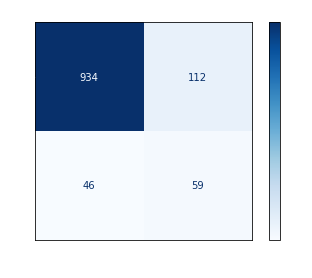


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2440
           1       0.56      0.95      0.71       243

    accuracy                           0.93      2683
   macro avg       0.78      0.94      0.83      2683
weighted avg       0.96      0.93      0.94      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1046
           1       0.35      0.56      0.43       105

    accuracy                           0.86      1151
   macro avg       0.65      0.73      0.67      1151
weighted avg       0.90      0.86      0.88      1151


10-fold cross validation average accuracy: 0.881
--------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_

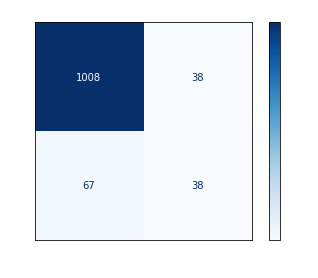


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      0.99      1.00       243

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1046
           1       0.50      0.36      0.42       105

    accuracy                           0.91      1151
   macro avg       0.72      0.66      0.69      1151
weighted avg       0.90      0.91      0.90      1151


10-fold cross validation average accuracy: 0.914
--------------------------------------------------------------------

BaggingClassifier(base_estimator=SVC(class_weight='balanced'), max_features=0.5,
                  max_samples=0.5)  Model


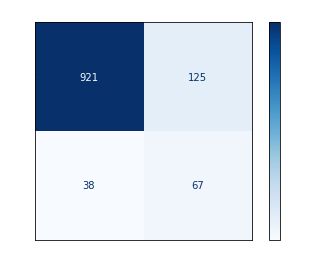


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2440
           1       0.44      0.83      0.58       243

    accuracy                           0.89      2683
   macro avg       0.71      0.86      0.76      2683
weighted avg       0.93      0.89      0.90      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1046
           1       0.35      0.64      0.45       105

    accuracy                           0.86      1151
   macro avg       0.65      0.76      0.68      1151
weighted avg       0.90      0.86      0.88      1151


10-fold cross validation average accuracy: 0.871
--------------------------------------------------------------------

BaggingClassifier(base_estimator=SVC(class_weight='balanced', kernel='linear'),
                  max_features=0.5, max_samples=0.5)  Model


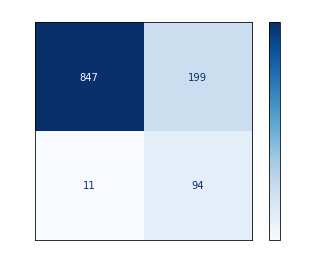


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2440
           1       0.34      0.90      0.50       243

    accuracy                           0.84      2683
   macro avg       0.67      0.87      0.70      2683
weighted avg       0.93      0.84      0.87      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1046
           1       0.32      0.90      0.47       105

    accuracy                           0.82      1151
   macro avg       0.65      0.85      0.68      1151
weighted avg       0.93      0.82      0.85      1151


10-fold cross validation average accuracy: 0.832
--------------------------------------------------------------------

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)  Model


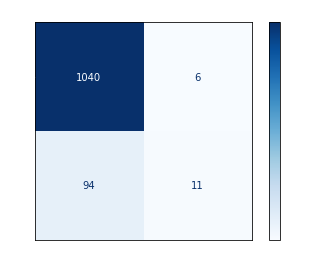


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2440
           1       0.88      0.18      0.30       243

    accuracy                           0.92      2683
   macro avg       0.90      0.59      0.63      2683
weighted avg       0.92      0.92      0.90      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1046
           1       0.65      0.10      0.18       105

    accuracy                           0.91      1151
   macro avg       0.78      0.55      0.57      1151
weighted avg       0.89      0.91      0.88      1151


10-fold cross validation average accuracy: 0.909
--------------------------------------------------------------------



In [238]:
ml=[logistic,knn,decision,random,svcrbf,svclinear,svcpoly,xgbclass,bagclassrbf,bagclasslinear,bagclassknn]
model_output(ml,xtrain,ytrain,xtest,ytest)

Overall SVC(linear) has best recall 92% of possitive and overall accuracy 84% 

## Hyper parameter tunning

In [239]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### logistic Regression

In [240]:
parameter_logistic={'penalty':['l1', 'l2', 'elasticnet','None'],
'C':[0.01,0.1,1,5,10,50],
'solver':['lbfgs','liblinear','newton-cg','newton-cholesky'],
'multi_class':['auto','ovr'],
'verbose':[0.1,0,1,2,5,7,9]   
}

gscv_logistic = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=parameter_logistic, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperlogistic=gscv_logistic.fit(xtrain,ytrain)
gridlogistic=hyperlogistic.best_estimator_
gridlogistic

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.01, verbose=0.1)

### KNN classifier

In [241]:
parameter_knn={'n_neighbors':[3,4,5,6,7,8],
'weights':['uniform','distance'],
'p':[1,2]  
}

gscv_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                        param_grid=parameter_knn, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperknn=gscv_knn.fit(xtrain,ytrain)
Gridknn=hyperknn.best_estimator_
Gridknn

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

### Decision Tree

In [242]:
parameter_decision={'criterion':['gini','entropy','log_loss'],
'max_depth':[2,3,4,5,6,7,8],
'max_features':['auto','sqrt','log2','None']  
}

gscv_decision = GridSearchCV(estimator=DecisionTreeClassifier(), 
                        param_grid=parameter_decision, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperdecision=gscv_decision.fit(xtrain,ytrain)
Griddecision=hyperdecision.best_estimator_
Griddecision

Fitting 5 folds for each of 84 candidates, totalling 420 fits


DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='sqrt')

### Random forest claasifier

In [243]:
parameter_random={'n_estimators':[70,100,200,400,600,800],
'criterion':['gini','entropy','log_loss'],
'max_depth':['None',3,5,7,8,10],
'max_features':['sqrt','log2']
}

gscv_random = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=parameter_random, 
                        cv=3,
                        verbose=True, n_jobs=-1)

hyperrandom=gscv_random.fit(xtrain,ytrain)
Gridrandom=hyperrandom.best_estimator_
Gridrandom

Fitting 3 folds for each of 216 candidates, totalling 648 fits


RandomForestClassifier(criterion='entropy', max_depth=10)

### SCV kernel-rbf

In [244]:
parameter_svcrbf={'C': [0.1,1,5,10,50,100], 
              'gamma': ['scale',1,0.1,0.01, 0.001,0.005, 0.0001],
              'kernel': ['rbf'],
              'class_weight':['balanced','None']}
gscv_svcrbf = GridSearchCV(estimator=SVC(), 
                        param_grid=parameter_svcrbf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hypersvcrbf=gscv_svcrbf.fit(xtrain,ytrain)
Gridsvcrbf=hypersvcrbf.best_estimator_
Gridsvcrbf

Fitting 5 folds for each of 84 candidates, totalling 420 fits


SVC(C=5, class_weight='balanced', gamma=1)

### Bagging SVC kerner- rbf

In [245]:
parameter_bagrbf={'n_estimators':[8,10,12,14],
                  'max_samples':[0.5,0.8,1,1.5]
             }
gscv_bagrbf = GridSearchCV(estimator=BaggingClassifier(SVC(kernel='rbf', class_weight='balanced')), 
                        param_grid=parameter_bagrbf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperbagrbf=gscv_bagrbf.fit(xtrain,ytrain)
Gridbagrbf=hyperbagrbf.best_estimator_
Gridbagrbf

Fitting 5 folds for each of 16 candidates, totalling 80 fits


BaggingClassifier(base_estimator=SVC(class_weight='balanced'), max_samples=0.5)

### Bagging SVC kerner- linear

In [246]:
parameter_baglinear={'n_estimators':[8,10,12,14],
                  'max_samples':[0.5,0.8,1,1.5]}
gscv_baglinear = GridSearchCV(estimator=BaggingClassifier(SVC(kernel='linear', class_weight='balanced')), 
                        param_grid=parameter_baglinear, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperbaglinear=gscv_baglinear.fit(xtrain,ytrain)
Gridbaglinear=hyperbaglinear.best_estimator_
Gridbaglinear

Fitting 5 folds for each of 16 candidates, totalling 80 fits


BaggingClassifier(base_estimator=SVC(class_weight='balanced', kernel='linear'),
                  max_samples=0.5, n_estimators=8)

### SVC kernel - linear

In [247]:
parameter_svclinear={'C': [0.1,1,5,10,50], 
              'gamma': ['scale',1, 0.1, 0.01, 0.001,0.005, 0.0001],
              'kernel': ['linear'],
              'class_weight':['balanced','None']}
gscv_svclinear = GridSearchCV(estimator=SVC(), 
                        param_grid=parameter_svclinear, 
                        cv=4,
                        verbose=True, n_jobs=-1)

hypersvclinear=gscv_svclinear.fit(xtrain,ytrain)
Gridsvclinear=hypersvclinear.best_estimator_
Gridsvclinear

Fitting 4 folds for each of 70 candidates, totalling 280 fits


SVC(C=50, class_weight='balanced', kernel='linear')

### XGBOOST Classifier

In [248]:
parameter_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5]
}

gscv_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), 
                        param_grid=parameter_xgb, 
                        cv=3,
                        verbose=True, n_jobs=-1)

hyperxgb=gscv_xgb.fit(xtrain,ytrain)
Gridxgb=hyperxgb.best_estimator_
Gridxgb

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

LogisticRegression(C=0.01, verbose=0.1)  Model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


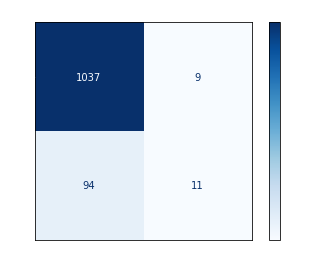


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2440
           1       0.78      0.21      0.33       243

    accuracy                           0.92      2683
   macro avg       0.85      0.60      0.64      2683
weighted avg       0.91      0.92      0.90      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1046
           1       0.55      0.10      0.18       105

    accuracy                           0.91      1151
   macro avg       0.73      0.55      0.56      1151
weighted avg       0.88      0.91      0.88      1151


10-fold cross validation average accuracy: 0.920
--------------------------------------------------------------------

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')  Model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

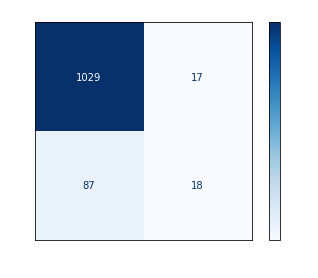


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       243

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1046
           1       0.51      0.17      0.26       105

    accuracy                           0.91      1151
   macro avg       0.72      0.58      0.60      1151
weighted avg       0.88      0.91      0.89      1151


10-fold cross validation average accuracy: 0.912
--------------------------------------------------------------------

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='sqrt')  Model


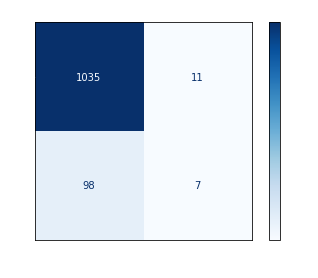


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2440
           1       0.87      0.14      0.23       243

    accuracy                           0.92      2683
   macro avg       0.89      0.57      0.60      2683
weighted avg       0.92      0.92      0.89      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1046
           1       0.39      0.07      0.11       105

    accuracy                           0.91      1151
   macro avg       0.65      0.53      0.53      1151
weighted avg       0.87      0.91      0.87      1151


10-fold cross validation average accuracy: 0.913
--------------------------------------------------------------------

RandomForestClassifier(criterion='entropy', max_depth=10)  Model


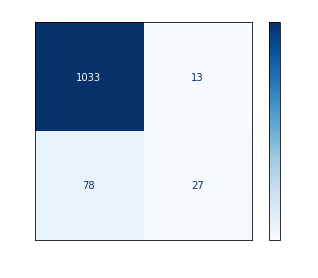


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2440
           1       0.99      0.65      0.79       243

    accuracy                           0.97      2683
   macro avg       0.98      0.83      0.89      2683
weighted avg       0.97      0.97      0.97      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1046
           1       0.68      0.26      0.37       105

    accuracy                           0.92      1151
   macro avg       0.80      0.62      0.67      1151
weighted avg       0.91      0.92      0.90      1151


10-fold cross validation average accuracy: 0.921
--------------------------------------------------------------------

SVC(C=5, class_weight='balanced', gamma=1)  Model


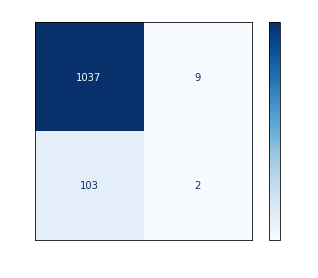


Training Accuracy Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00       243

    accuracy                           1.00      2683
   macro avg       1.00      1.00      1.00      2683
weighted avg       1.00      1.00      1.00      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1046
           1       0.18      0.02      0.03       105

    accuracy                           0.90      1151
   macro avg       0.55      0.51      0.49      1151
weighted avg       0.84      0.90      0.87      1151


10-fold cross validation average accuracy: 0.906
--------------------------------------------------------------------

SVC(C=50, class_weight='balanced', kernel='linear')  Model


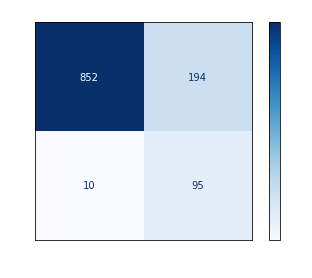


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2440
           1       0.35      0.92      0.51       243

    accuracy                           0.84      2683
   macro avg       0.67      0.88      0.71      2683
weighted avg       0.93      0.84      0.87      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1046
           1       0.33      0.90      0.48       105

    accuracy                           0.82      1151
   macro avg       0.66      0.86      0.69      1151
weighted avg       0.93      0.82      0.86      1151


10-fold cross validation average accuracy: 0.836
--------------------------------------------------------------------

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopp

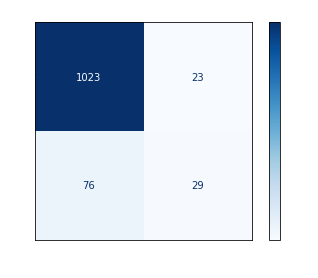


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2440
           1       0.85      0.52      0.64       243

    accuracy                           0.95      2683
   macro avg       0.90      0.75      0.81      2683
weighted avg       0.94      0.95      0.94      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1046
           1       0.56      0.28      0.37       105

    accuracy                           0.91      1151
   macro avg       0.74      0.63      0.66      1151
weighted avg       0.90      0.91      0.90      1151


10-fold cross validation average accuracy: 0.919
--------------------------------------------------------------------

BaggingClassifier(base_estimator=SVC(class_weight='balanced', kernel='linear'),
                  max_samples=0.5, n_estimators=8)  Model


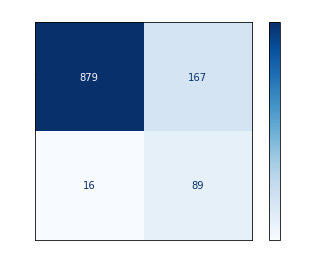


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2440
           1       0.37      0.89      0.52       243

    accuracy                           0.85      2683
   macro avg       0.68      0.87      0.72      2683
weighted avg       0.93      0.85      0.88      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1046
           1       0.35      0.85      0.49       105

    accuracy                           0.84      1151
   macro avg       0.66      0.84      0.70      1151
weighted avg       0.92      0.84      0.87      1151


10-fold cross validation average accuracy: 0.852
--------------------------------------------------------------------

BaggingClassifier(base_estimator=SVC(class_weight='balanced'), max_samples=0.5)  Model


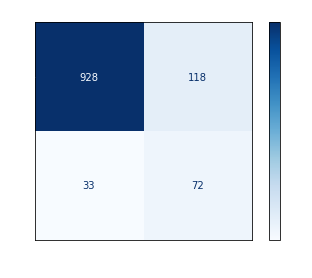


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2440
           1       0.48      0.84      0.61       243

    accuracy                           0.90      2683
   macro avg       0.73      0.87      0.78      2683
weighted avg       0.94      0.90      0.91      2683

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1046
           1       0.38      0.69      0.49       105

    accuracy                           0.87      1151
   macro avg       0.67      0.79      0.71      1151
weighted avg       0.91      0.87      0.88      1151


10-fold cross validation average accuracy: 0.878
--------------------------------------------------------------------



In [249]:
ml1=[gridlogistic,Gridknn,Griddecision,Gridrandom,Gridsvcrbf,Gridsvclinear,Gridxgb,Gridbaglinear,Gridbagrbf]
model_output(ml1,xtrain,ytrain,xtest,ytest)

### Feature importance

In [250]:

def features(featuresList,xtrain,ytrain,xtest,ytest,cols):
    from sklearn.inspection import permutation_importance
    for i in featuresList:
        print(i)
        if(i in [decision,random,xgbclass,Griddecision,Gridrandom,Gridxgb]):
            
            importance1 = i.feature_importances_
            # summarize feature importance

            for a in range(len(cols)):
                print(cols[a]," : ",importance1[a])
        if(i in [logistic,svclinear,Gridsvclinear]):
            importance2 = i.coef_[0]
            # summarize feature importance
            for a in range(len(cols)):
                print(cols[a]," : ",importance2[a])
        if(i in [svcrbf,knn,Gridknn,Gridsvcrbf]):
            from matplotlib import pyplot
            # perform permutation importance
            results = permutation_importance(i, xtrain, ytrain, scoring='recall')
            # get importance
            importance = results.importances_mean
            # importance=np.sort(importance)
            # summarize feature importance
            for a in range(len(importance)):
                print(cols[a], " : ", importance[a]) 
    print("----------------------------------------------------------")
    print()

 

In [251]:
featuresList=[logistic,knn,decision,random,svcrbf,svclinear,svcpoly,xgbclass,bagclassrbf,bagclasslinear,bagclassknn]
features(featuresList,xtrain,ytrain,xtest,ytest,cols)

LogisticRegression()
education  :  0.0911038468282771
job_blue_collar  :  -0.1958661146053452
housing  :  -0.010409200234068878
contact_telephone  :  0.002941720025939768
age  :  -0.0664624847950231
contact_cellular  :  -0.002941720025939768
job_student  :  0.013987676372606568
day_of_week_thu  :  0.008341675852092445
marital_married  :  -0.00796613293310554
month_sep  :  0.0628013801573314
campaign  :  -0.1044878799392161
job_admin_  :  -0.0033289260050057405
duration  :  1.5762867113978956
job_housemaid  :  -0.00011892082154410681
cons_conf_idx  :  0.17207234879665198
emp_var_rate  :  -1.030947726683012
month_may  :  -0.4772077644948731
month_oct  :  0.09579348589070806
previous  :  0.23934796722281948
day_of_week_mon  :  -0.019577111227279165
month_dec  :  0.04736317193759332
month_mar  :  0.21395589985622834
KNeighborsClassifier(weights='distance')
education  :  0.3358024691358025
job_blue_collar  :  0.205761316872428
housing  :  0.31522633744855966
contact_telephone  :  0.24609053